<a href="https://colab.research.google.com/github/Jalilnkh/FastAi-Flask-SQLAlchemy/blob/main/Video_classification_FastAi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!conda install -c pytorch pytorch-cpu torchvision
 
!conda install -c fastai fastaiorpip install http://download.pytorch.org/whl/cpu/torch-1.0.0-cp36-cp36m-linux_x86_64.whl
 
!pip install fastai

/bin/bash: conda: command not found
/bin/bash: conda: command not found


In [2]:
from fastai.vision import *
 
!pip install ffmpeg

  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6084 sha256=2d6f175492087e1818c31671bb310da03d0179e83f9737bc48ecc6488f62f6be
  Stored in directory: /root/.cache/pip/wheels/64/80/6e/caa3e16deb0267c3cbfd36862058a724144e19fdb9eb03af0f
Successfully built ffmpeg


In [7]:
!unzip -q '/content/dataset.zip'

In [9]:
path='/content/dataset'
np.random.seed(42) 
data=ImageDataBunch.from_folder(path, train='.',valid_pct=0.2 ,
                                ds_tfms=get_transforms(),size=224, num_workers=4).normalize(imagenet_stats)
 
data
 

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


ImageDataBunch;

Train: LabelList (2880 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
2,2,2,2,2
Path: /content/dataset;

Valid: LabelList (720 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
1,1,3,3,2
Path: /content/dataset;

Test: None

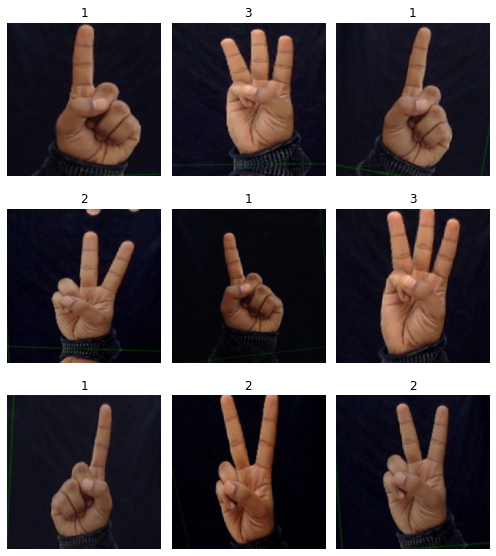

In [10]:
data.show_batch(rows=3, figsize=(7, 8))

In [11]:
from fastai.metrics import error_rate# 1 - accuracy
learn=create_cnn(data, models.resnet34, metrics=error_rate)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [12]:
defaults.device=torch.device('cuda') # makes sure the gpu is used
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.213405,0.000040,0.000000,16:25
1,0.067447,0.000011,0.000000,16:23
2,0.026600,0.000024,0.000000,16:26
3,0.012133,0.000020,0.000000,16:26


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
learn.unfreeze() # must be done before calling lr_find
learn.lr_find()
 
learn.save('model-I')

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


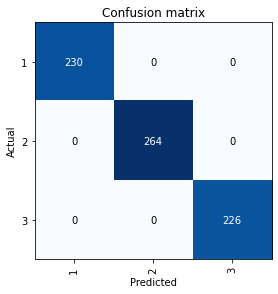

In [13]:
interp =ClassificationInterpretation.from_learner(learn)
 
interp.plot_confusion_matrix()


In [ ]:
model=learn.load('model-1')

In [16]:
import cv2 
video_path='/content/video_2021-08-13_14-37-00.mp4'

In [29]:

cap = cv2.VideoCapture(video_path)
_, frame= cap.read()
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
img_t = pil2tensor(frame, np.float32)
img_t.div_(255.0)
image = Image(img_t)
pred = learn.predict(image)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


In [30]:
pred[2][0]

tensor(0.9836)

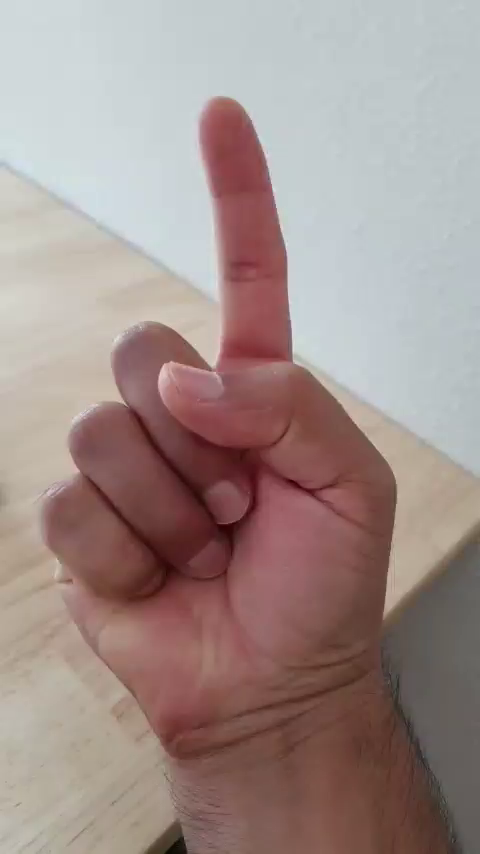

In [34]:
image